In [5]:
%matplotlib inline

In [6]:
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
#Mathematical constants
pi = np.pi
tpi = 2.0*pi
fpi = 4.0*pi
zI = 1.0j
#Physical constants
#https://ja.wikipedia.org/wiki/%E5%8E%9F%E5%AD%90%E5%8D%98%E4%BD%8D%E7%B3%BB
aB = 0.0529177210903 #nanometer
Hartree = 27.211386245988 #eV
Atomtime = 0.024188843265857 #fs
Atomfield = Hartree/aB #V/nm
#https://ja.wikipedia.org/wiki/%E5%BE%AE%E7%B4%B0%E6%A7%8B%E9%80%A0%E5%AE%9A%E6%95%B0
sol = 137.035999084 #speed of light
ch = 1241.5 #eV * nm
chbar = 197.3 # eV * nm
halfepsc = 3.509e16 # W/cm^2 \frac{1}{2}*\epsilon_0 * c
Atomfluence = halfepsc*Atomtime*1.0e-15 # J/cm^2 ,W/cm^2 * fs = femto J/cm^2

In [7]:
def elkband(dirname):
    fname = dirname + '/BAND.OUT'
    f = open(fname,'r')
    lines = f.readlines()
    f.close()
    Nlen = len(lines)
    print(Nlen, ': No. of lines of the file, ',fname)
    #Nlen = NK*NB + (NB-1) + 1= (NK + 1)*NB 
    NK = 200
    NB = Nlen/(NK + 1)
    NB = int(NB)
    print('NB =', NB)
    j=0
    eigval = np.zeros([NB,NK],dtype = 'float64')
    k = np.zeros([NK],dtype = 'float64')
    for ib in range(NB):
        for ik in range(NK):
            temp = lines[j].split()
            k[ik] = np.float(temp[0])
            eigval[ib,ik] = np.float(temp[1])
            j = j + 1
        j = j + 1
    fname = dirname + '/BANDLINES.OUT'
    f = open(fname,'r')
    lines = f.readlines()
    f.close()
    Nlen = len(lines)
    print(Nlen, ': No. of lines of the file, ',fname)
    kticks = []
    temp = lines[0].split()
    kticks.append(float(temp[0]))
    temp = lines[3].split()
    kticks.append(float(temp[0]))
    temp = lines[6].split()
    kticks.append(float(temp[0]))
    temp = lines[9].split()
    kticks.append(float(temp[0]))
    temp = lines[12].split()
    kticks.append(float(temp[0]))
    print(kticks)
    return kticks, k, eigval

4623 : No. of lines of the file,  /home/shinohara/work/YMSA_work/2019_06_26/elk/primitive/BAND.OUT
NB = 23
15 : No. of lines of the file,  /home/shinohara/work/YMSA_work/2019_06_26/elk/primitive/BANDLINES.OUT
[0.0, 0.2939639425, 0.7096917369, 1.003655679, 1.512816163]


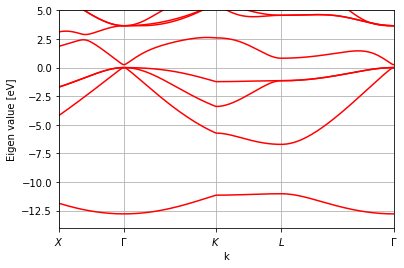

In [9]:
#
dirname = '/home/shinohara/work/YMSA_work/2019_06_26/elk/primitive'
kticks, kelk, eigvalelk = elkband(dirname)
#
EVTelk = np.amax(eigvalelk[12,:])
plt.xlabel('k')
plt.ylabel('Eigen value [eV]')
plt.xlim(np.amin(kelk),np.amax(kelk))
plt.ylim(-14,5)
plt.xticks(kticks, ['$X$', '$\Gamma$', '$K$', '$L$', '$\Gamma$'])
temp = np.shape(eigvalelk)
NBelk = temp[0]
for ib in range(NBelk):
    plt.plot(kelk,(eigvalelk[ib,:] - EVTelk)*Hartree,'r-')
plt.grid()
#plt.legend()

In [10]:
def abinitband(dirname):
    fname = dirname + '/DFTo_DS3_EIG'
    f = open(fname,'r')
    lines = f.readlines()
    f.close()
    Nlen = len(lines)
    print(Nlen, ': No. of lines of the file, ',fname)
    temp = lines[0].split()
    NK = np.int(temp[4])
    print(NK)
    temp = lines[1].split(',')
    temp = temp[1]
    temp = temp.split()
    NB = np.int(temp[1])
    print(NB)
    eigval = np.zeros([NB,NK],dtype = 'float64')
    kred = np.zeros([NK,3],dtype = 'float64')
    for ik in range(NK):
        j = 2*(ik + 1)
        temp = lines[j].split()
        for ib in range(NB):
            eigval[ib,ik] = np.float(temp[ib])
#    print(temp)
        j = 2*ik + 1
        temp = lines[j].split()
#    print(temp[7],temp[8],temp[9])
        kred[ik,0] = np.float(temp[7])
        kred[ik,1] = np.float(temp[8])
        kred[ik,2] = np.float(temp[9])

#
    fname = dirname + '/output.out'
    f = open(fname,'r')
    lines = f.readlines()
    f.close()
    Nlen = len(lines)
    print(Nlen, ': No. of lines of the file, ',fname)
    for i in range(Nlen):
        temp = lines[i]
        fd1 = temp.find('R(1)')
        fd2 = temp.find('R(2)')
        fd3 = temp.find('R(3)')
        if (fd1 > 0):
            R1 = np.zeros(3)
            temp = temp.split()
            R1[0] = np.float(temp[1])
            R1[1] = np.float(temp[2])
            R1[2] = np.float(temp[3])
        if (fd2 > 0):
            R2 = np.zeros(3)
            temp = temp.split()
            R2[0] = np.float(temp[1])
            R2[1] = np.float(temp[2])
            R2[2] = np.float(temp[3])
        if (fd3 > 0):
            R3 = np.zeros(3)
            temp = temp.split()
            R3[0] = np.float(temp[1])
            R3[1] = np.float(temp[2])
            R3[2] = np.float(temp[3])
    print(R1)
    print(R2)
    print(R3)
    vol = np.dot(R1,np.cross(R2,R3))
    G1 = np.cross(R2,R3)/vol*tpi
    G2 = np.cross(R3,R1)/vol*tpi
    G3 = np.cross(R1,R2)/vol*tpi
    print(G1)
    print(G2)
    print(G3)

    k = np.zeros([NK],dtype = 'float64')
    k[0] = 0.0
    for ik in range(1,NK):
        dkred = kred[ik,:] - kred[ik-1,:]
        dk = dkred[0]*G1 + dkred[1]*G2 + dkred[2]*G3
        k[ik] = k[ik-1] + np.linalg.norm(dk)
    return k, eigval

163 : No. of lines of the file,  /home/shinohara/work/YMSA_work/2019_06_26/abinit/primitive//DFTo_DS3_EIG
81
8
1458 : No. of lines of the file,  /home/shinohara/work/YMSA_work/2019_06_26/abinit/primitive//output.out
[0.     5.3435 5.3435]
[5.3435 0.     5.3435]
[5.3435 5.3435 0.    ]
[-0.58792789  0.58792789  0.58792789]
[ 0.58792789 -0.58792789  0.58792789]
[ 0.58792789  0.58792789 -0.58792789]


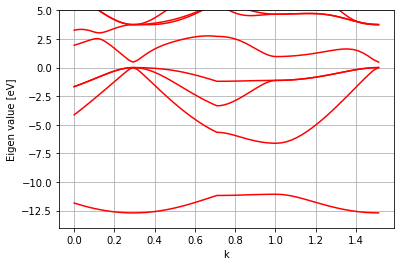

In [11]:
#
dirname = '/home/shinohara/work/YMSA_work/2019_06_26/abinit/primitive/'
kabinit, eigvalabinit = abinitband(dirname)
#
EVTabinit = np.amax(eigvalabinit[3,:])
plt.xlabel('k')
plt.ylabel('Eigen value [eV]')
plt.ylim(-14,5)
temp = np.shape(eigvalabinit)
NBabinit = temp[0]
for ib in range(NBabinit):
    plt.plot(kabinit,(eigvalabinit[ib,:] - EVTabinit)*Hartree,'r-')
plt.grid()
#plt.legend()

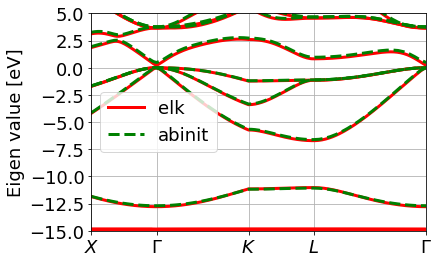

In [13]:
#
#plt.xlabel('k')
plt.ylabel('Eigen value [eV]', fontsize=18)
plt.xlim(np.amin(kelk),np.amax(kelk))
plt.ylim(-15,5)
plt.xticks(kticks, ['$X$', '$\Gamma$', '$K$', '$L$', '$\Gamma$'], fontsize=18)
plt.yticks(fontsize=18)
lw = 3.0
EVTelk = np.amax(eigvalelk[12,:])
temp = np.shape(eigvalelk)
NBelk = temp[0]
ib = 0
plt.plot(kelk,(eigvalelk[ib,:] - EVTelk)*Hartree,'r-',linewidth = lw,label='elk')
for ib in range(1,NBelk):
    plt.plot(kelk,(eigvalelk[ib,:] - EVTelk)*Hartree,'r-',linewidth = lw)
EVTabinit = np.amax(eigvalabinit[3,:])
temp = np.shape(eigvalabinit)
NBabinit = temp[0]
ib = 0
plt.plot(kabinit,(eigvalabinit[ib,:] - EVTabinit)*Hartree,'g--',linewidth = lw,label = 'abinit')
for ib in range(1,NBabinit):
    plt.plot(kabinit,(eigvalabinit[ib,:] - EVTabinit)*Hartree,'g--',linewidth = lw)
plt.grid()
plt.legend(fontsize=18)
plt.savefig("bands.pdf", bbox_inches='tight')
plt.show()